In [1]:
import numpy as np
from netCDF4 import Dataset # conda install -c anaconda netcdf4
import pandas as pd

In [2]:
f = Dataset('DataAnginSalbi.nc')
print (f.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10'])


In [3]:
time = f.variables['time'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
u10 = f.variables['u10'][:]
v10 = f.variables['v10'][:]

In [4]:
print ('shape time',np.shape(time))
print ('shape lats',np.shape(lats))
print ('shape v10',np.shape(v10))

shape time (124,)
shape lats (1,)
shape v10 (124, 1, 1)


In [91]:
# Menghitung nilai statistik dari 
uv_stat = { 'stat':['mean','max','min'],
            'u10': [u10.mean(), u10.max(), u10.min()], 
            'v10': [v10.mean(), v10.max(), v10.min()]}

df = pd.DataFrame(uv_stat)

df.set_index('stat',inplace=True)
display (df)

,u10,v10
stat,,
mean,5.783011,1.103428
max,10.770667,6.571780
min,1.266091,-4.288693


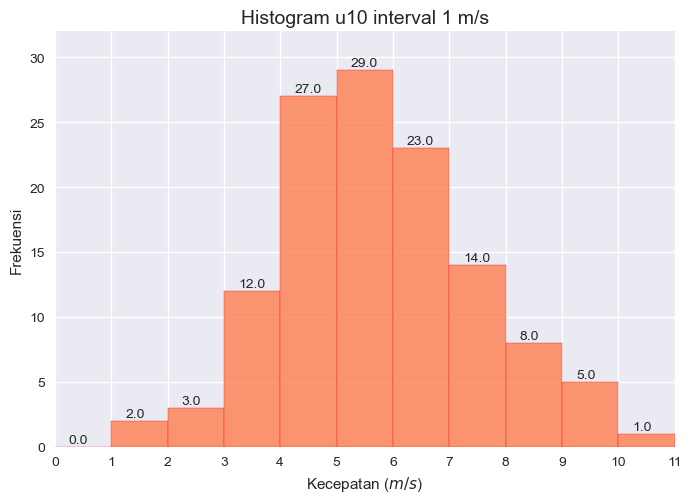

In [79]:
import matplotlib.pyplot as plt

xu = np.arange(0,12,1)
hist,bin = np.histogram(u10[:,0,0],bins=xu)

plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=100)
ax.hist(u10[:,0,0],bins=xu,color='coral',edgecolor='red',alpha=.8)
ax.set_title('Histogram u10 interval 1 m/s', fontsize=14)
ax.set_xlabel('Kecepatan ($m/s$)')
ax.set_ylabel('Frekuensi')
ax.set_xticks(xu)
ax.set(xlim=(0,11),ylim=(0,32))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.25, p.get_height()+ .3))
    
plt.show()

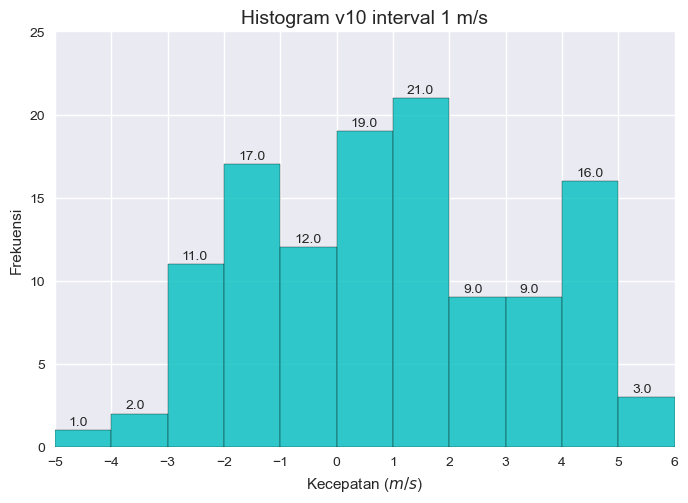

In [90]:
xv = np.arange(-5,7,1)

fig, ax = plt.subplots(dpi=100)
ax.hist(v10[:,0,0],bins=xv,color='c',edgecolor='k',alpha=.8)
ax.set_title('Histogram v10 interval 1 m/s', fontsize=14)
ax.set_xlabel('Kecepatan ($m/s$)')
ax.set_ylabel('Frekuensi')
ax.set_xticks(xv)
ax.set(xlim=(-5,6),ylim=(0,25))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.25, p.get_height()+ .3))
    
plt.show()